In [12]:
import numpy as np
import pandas as pd
from PIL import Image

# Array Based

#### Sort array of 0,1


In [20]:
def sort_01(arr):
    lo = 0
    hi = len(arr)-1

    while lo <= hi:
        while arr[lo] == 0:  # find 1 from l->R
            lo += 1            
        while arr[hi] == 1: # find 0 from R<-L
            hi -= 1

        if lo >= hi:
            break
        arr[lo],arr[hi] = arr[hi],arr[lo]
        lo += 1
        hi -= 1
        # print(arr,lo,hi)

    return arr

In [21]:
arr = [1,0,0,1,1,0,1,0,0,0,1]
print(sort_01(arr))

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


#### Sort array of 0,1,2 : Dutch National Flag Algorithm

In [2]:
def DNF(arr):
    '''
    lo, cur, hi <- cur iterates and swaps...
    0s in between : 0<->lo
    2s in between : hi<->N
    1s get auto-filles betwwen lo<->hi
    At any points.. i<lo : 0s filled, i>hi : 2s filled
    '''

    lo = cur = 0
    hi = len(arr)-1

    while cur <= hi: # mid>hi, stop(everything after hi is already 2)
        if arr[cur] == 0:
            arr[lo],arr[cur] = arr[cur], arr[lo]
            lo += 1
            cur += 1
        elif arr[cur] == 2:
            arr[cur],arr[hi] = arr[hi], arr[cur]
            hi -= 1
        else:
            cur += 1
    return arr


In [4]:
arr = [0,2,1,2,1,0,0,0,0,2]
print(DNF([2,0,1]))

[0, 1, 2]


In [1]:
'''
Q> Why swap(hi--,cur), swap(lo++,cur++) 
-> hi = {0,1,2}
2,1 -> no problem
if its 0, then if u increment mid -> It will move ahead

BUT, always cur > low, so everything before mid is already in place [0 or 1]
'''

'\nQ> Why swap(hi--,mid), swap(lo++,mid++) \n-> hi = {0,1,2}\n2,1 -> no problem\nif its 0, then if u increment mid -> It will move ahead\n\nBUT, always mid > low, so everything before mid is already in place [0 or 1]\n'

#### Subarray Sum = 0

![Subarray_Sum_0]("src/subarray_sum_0.png)

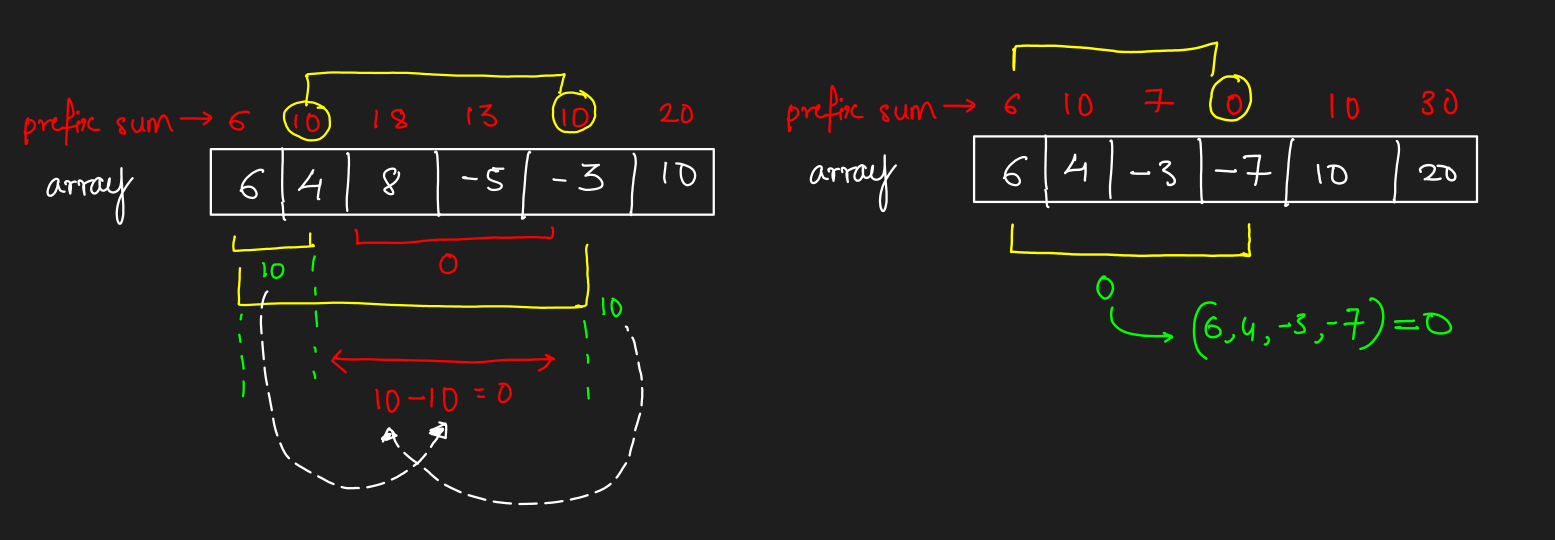

In [132]:
display(Image.open('src/subarray_sum_0.png'))

Solution
1. Calculate Prefix sum
2. While calculating prefix sum array, 
    - if `cur_sum` was previously seen
        - THEN, arr[`last_seen_sum_index`+1 : `cur_sum_index`] = 0  
    - if `cur_sum` = 0,
        - then, arr[0 : `cur_sum_index`] = 0


In [10]:
def check_zero_sum(arr):
    '''
    Return [start_index, end_index] which has subarray sum = 0
    '''
    n = len(arr)
    curSum = 0
    hist = {}

    curSum = 0
    for i,x in enumerate(arr):
        curSum += x
        if x in hist:
            return (hist[x]+1,i)
        elif curSum == 0:
            return (0,i)
        else:
            hist[curSum] = i
    return None


In [11]:
arr = [10, 20, -30, 1, 6]
check_zero_sum(arr)

(0, 2)

#### Max Subarray Sum - Kadanes
( Doesnt give length or exact elements )

In [36]:
def kadanes(arr):
    '''
    Return maximum subarary sum (only sum not indices)
    '''
    max_res = 0
    curSum = 0
    startIndex = endIndex = 0
    for idx, x in enumerate(arr):
        curSum += x
        if curSum < 0:
            curSum = 0
        else:
            max_res = max(max_res, curSum)
    print(startIndex, endIndex)
    return max_res

In [39]:
arr = [-2, -3, 4, -1, -2, 1, 5, -3]
print(kadanes(arr))

0 0
7


#### Two, Three Sum

In [46]:
def two_sum(arr, target):
    '''
    Return (x,y) E arr, x+y = target
    '''
    hmap = set()
    for x in arr:
        remSum = target-x
        if remSum in hmap:
            return (remSum,x)
        else:
            hmap.add(x)
    return None
    

In [50]:
def three_sum(arr, target):
    n = len(arr)
    for i, x in enumerate(arr[:-1]):
        twoSumRes = two_sum(arr[i:], target-x)
        if twoSumRes is not None:
            return (twoSumRes[0], twoSumRes[1], x)
    return None

        

In [52]:
arr = [11,2,8,12,-7,23,40,10]
three_sum(arr,63)


(12, 40, 11)

#### Max Length Subarray Sum with given Target 
( Prefix Method : Gives exact elements and one giving max length ) 

![Subarray_Sum_0]("./src/max_len_subarray_sum.png")

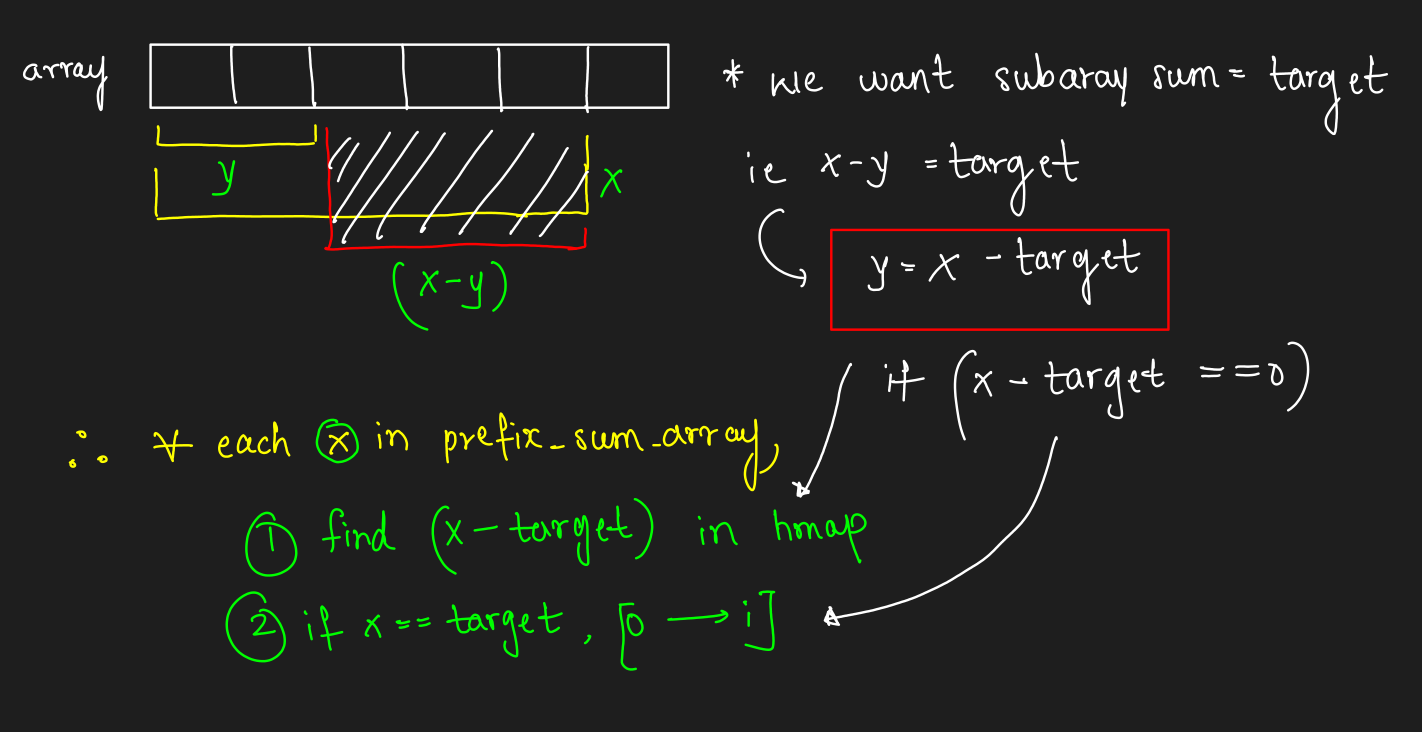

In [133]:
display(Image.open('src/max_len_subarray_sum.png'))

In [108]:
def longest_subarray_target(arr, target):
    n = len(arr)
    cSum = maxLen = 0
    hmap = {}
    resIndex = [0,0]

    for i, x in enumerate(arr):
        cSum += x
        findHmap = cSum-target
        if cSum == target:
            newLen = i+1
            if newLen > maxLen:
                maxLen = newLen
                resIndex[0], resIndex[1] = 0, i
        elif findHmap in hmap: # Target found
            newLen = i-hmap[findHmap]
            if newLen > maxLen:
                maxLen = newLen
                resIndex[0], resIndex[1] = hmap[findHmap]+1, i
        elif cSum not in hmap:  # why always add? [We need left most index -> longest subarray, so if a sum is already there dont add newwer one]
            hmap[cSum] = i
            
    return (maxLen, resIndex)

In [109]:
arr = [5,6,-5,5,3,5,3,-2,0]
arr = [5,5,-5,-5,2]
# longest_subarray_target(arr, 8)
longest_subarray_target(arr, 2)

(5, [0, 4])

#### Equilibrium Point

![Equilibrium_Point]("./src/Equilibrium_Point.png")

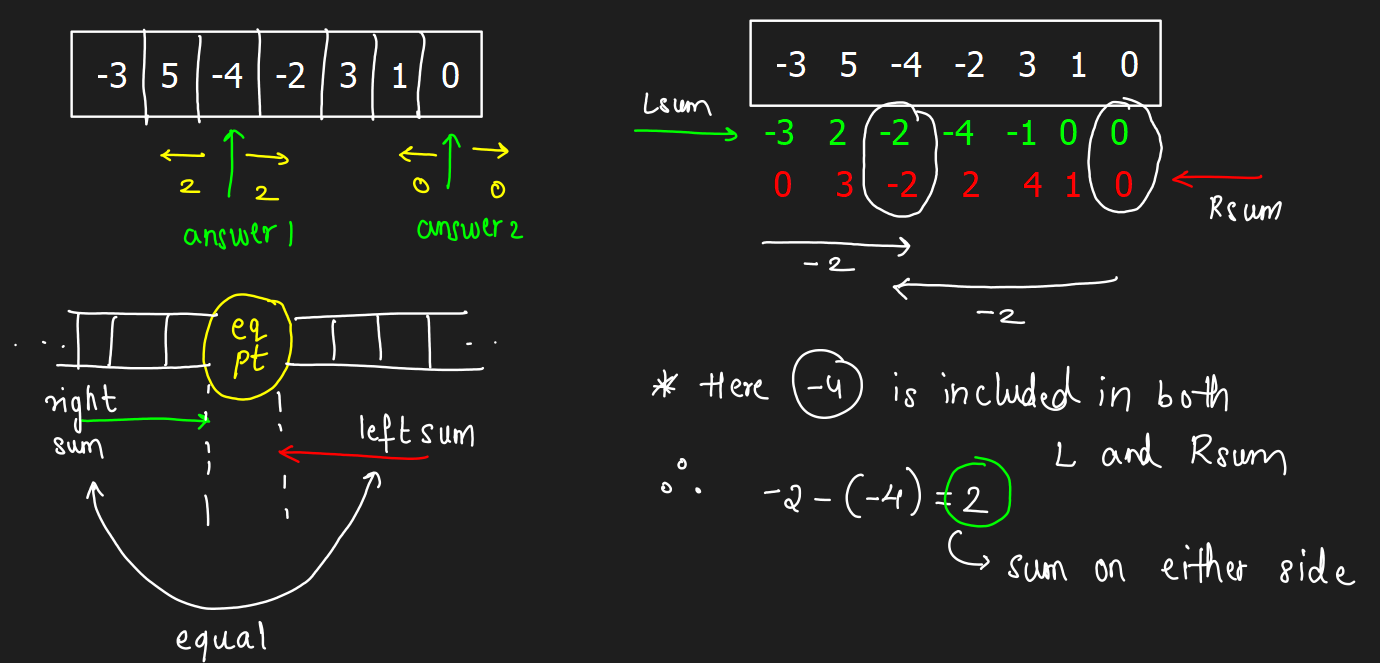

In [134]:
display(Image.open('src/Equilibrium_Point.png'))

In [128]:
def equilibrium(arr):
    '''
    Return equilibrium point
    '''
    n = len(arr)
    lSum = [0]*n

    cSum = 0
    for i in range(n):  # L->R Sum
        cSum += arr[i]
        lSum[i] = cSum

    cSum = 0
    for i in reversed(range(n)):  # L<-R Sum
        cSum += arr[i]
        if cSum == lSum[i]:
            return i
    return None
    
    

In [129]:
arr = [-3,5,-4,-2,3,1]
equilibrium(arr)

2

#### Stock Buy/Sell

In [9]:
# Single Buy/Sell
def max_profit_single(prices):
    max_profit = 0
    min_till_now = prices[0]

    for x in prices:
        max_profit = max(x-min_till_now, max_profit)
        min_till_now = min(x, min_till_now)

    return max_profit

# Multiple buy/sell ( But can hold only one stock at a time)
def max_profit(prices):
    '''
    If you find any local_minima -> add to profit
    '''
    n = len(prices)
    profit = 0

    for i in range(n-1):
        if prices[i] < prices[i+1]:
            profit += prices[i+1]-prices[i]

    return profit

In [10]:
arr1 = [7,1,5,3,6,4] # Expected 5
arr2 = [7,6,4,3,1] # Expected : 0

print(max_profit_single(arr1))

arr3 = [7,1,5,3,6,4] # expected 7
print(max_profit(arr3))


5
7


## Linked Lists

#### Reverse LL

In [9]:
def reverseList(self, head):
    prev = None
    next = None
    cur = head

    while cur is not None:
        next = cur.next
        cur.next = prev
        prev = cur
        cur = next
    return prev

#### Mid in Linked List

In [ ]:
def middleNode(self, head):
    slow = head
    fast = head

    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next

    return slow


## Graphs

#### Graph DS

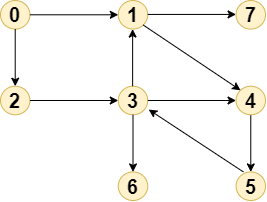

In [25]:
display(Image.open('src/graph0.png'))

In [59]:
adj = [
    [0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]
]

#### BFS

In [60]:
# Use QUEUE
def BFS(adj, src):
    n = len(adj[0]) # nodes = (0, n-1)
    queue = []
    queue.append(src)
    vis = [False]*n

    vis[src] = True
    while len(queue) != 0:
        cur_node = queue.pop(0)
        for node in range(n): # visit all nbrs of Node
            if adj[cur_node][node] == 1 and not vis[node]:
                queue.append(node)
                vis[node] = True
        print(cur_node,"->",end="")
    
    print()

In [61]:
BFS(adj,0)

0 ->1 ->2 ->4 ->7 ->3 ->5 ->6 ->


#### DFS

In [78]:
# Use STACK
def DFS(adj, src):
    n = len(adj[0]) # nodes = (0, n-1)
    queue = []
    queue.append(src)
    vis = [False]*n

    vis[src] = True
    while len(queue) != 0:
        cur_node = queue.pop()
        for node in range(n): # visit all nbrs of Node
            if adj[cur_node][node] == 1 and not vis[node]:
                queue.append(node)
                vis[node] = True
        print(cur_node,"->",end="")
    
    print()

# Use STACK
vis = []
def DFS_calls(src,adj):
    global vis
    print(src,"->",end="")
    vis[src] = True

    for node in range(len(adj[0])):
        if adj[src][node] != 0 and not vis:
            DFS_calls(node,adj)



In [81]:
DFS(adj,0)

vis = [False]*(len(adj[0]))
DFS(adj,0)

0 ->2 ->3 ->6 ->4 ->5 ->1 ->7 ->
0 ->2 ->3 ->6 ->4 ->5 ->1 ->7 ->


## Tree

## Recursion + DP

## Math